In [2]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [4]:
# importing the dataset
april_21 = pd.read_csv('202104-divvy-tripdata.csv')
may_21 = pd.read_csv('202105-divvy-tripdata.csv')
june_21 = pd.read_csv('202106-divvy-tripdata.csv')
july_21 = pd.read_csv('202107-divvy-tripdata.csv')
august_21 = pd.read_csv('202108-divvy-tripdata.csv')
september_21 = pd.read_csv('202109-divvy-tripdata.csv')
october_21 = pd.read_csv('202110-divvy-tripdata.csv')
november_21 = pd.read_csv('202111-divvy-tripdata.csv')
december_21 = pd.read_csv('202112-divvy-tripdata.csv')
january_22 = pd.read_csv('202201-divvy-tripdata.csv')
febuary_22 = pd.read_csv('202202-divvy-tripdata.csv')
march_22 = pd.read_csv('202203-divvy-tripdata.csv')

In [5]:
# combining the dataset 
df= pd.concat([april_21,may_21,june_21,july_21,august_21,september_21,october_21,november_21,december_21,january_22,
              febuary_22,march_22])

df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual


# overall information about the dataset

In [6]:
# checking the shape of the dataset

df.shape

(5723532, 13)

In [7]:
# checking the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5723532 entries, 0 to 284041
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 611.3+ MB


# Data Cleaning

In [8]:
# checking for the duplicate in the dataset
df.duplicated().sum()

0

In [9]:
# checking for the null value in the dataset
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    745376
start_station_id      745373
end_station_name      796247
end_station_id        796247
start_lat                  0
start_lng                  0
end_lat                 4716
end_lng                 4716
member_casual              0
dtype: int64

In [10]:
# Calculating the percentage of null values
print('The percentage of the missing values is:' , round((df.isna().sum().max() * 100) /df['ride_id'].count(),2),'%' )

The percentage of the missing values is: 13.91 %


13% of the data is missing, just counting the columns where there is the highest number of null values. 13% is a big deal and by that measure, our analysis could be considered bias. However, this columns contain information about the name, and id of the station where the ride began and ended. Although of some value, it is not critical information for our analysis. That's why I decide to keep these missing values, since we are not going to use these variables, instead of deleting the rows containing those missing values, which could endanger the analysis

# Formating Columns

In [11]:
# checking if the datatype align with the desired  format for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5723532 entries, 0 to 284041
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 611.3+ MB


In [12]:
# converting the column 'started_at' & 'ended_at' from object datatype to datetime
df['started_at']= pd.to_datetime(df['started_at'])
df['ended_at']= pd.to_datetime(df['ended_at'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5723532 entries, 0 to 284041
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 611.3+ MB


Deleting wrong entities

Now checking if there are not false date that are wrongly recorded

In [14]:
false_dates= df.loc[(df['started_at'] > df['ended_at'])]
false_dates.shape

(145, 13)

There are 145 wrong entries where the 'started_at' column has a datetime value lower than the correspondent 'ended_at' value. This is not possible since the start of the trip hast to be an earlier date and time than the end of the trip

In [15]:
# deleting the wrong entities
df = df.drop(false_dates.index.to_list()).copy()

Adding columns. I will add some columns, like the length of the ride, the day of the week, the hour of the day, and the name of the month to use them later at the analysis phase

In [16]:
df['ride_length_min'] = ((df['ended_at'] - df['started_at'])/pd.Timedelta(minutes=1)).astype('int32')

In [17]:
# creating the name of the day of the week

df['day'] = df['started_at'].dt.day_name()

# creating the hour of the day

df['hour'] = df['started_at'].dt.hour

# creating the month column

df['month'] = df['started_at'].dt.month

# creating day of week
df['day_of_week'] = df['started_at'].dt.dayofweek

With the recently column created, we sort the values in ascending order

In [18]:
df.sort_values(by='ride_length_min', ascending=True).head(4)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_min,day,hour,month,day_of_week
298935,109E1D34D9F9E595,electric_bike,2021-11-10 18:34:28,2021-11-10 18:34:40,Rush St & Cedar St,KA1504000133,NaN,NaN,41.902464,-87.627802,41.900000,-87.630000,member,0,Wednesday,18,11,2
547654,44133F3A381849A9,electric_bike,2021-10-27 08:02:58,2021-10-27 08:03:00,St. Clair St & Erie St,13016,St. Clair St & Erie St,13016,41.894194,-87.622822,41.894208,-87.622864,casual,0,Wednesday,8,10,2
296317,80198B33C8BE45AB,electric_bike,2021-10-22 17:58:48,2021-10-22 17:59:12,Racine Ave & Fullerton Ave,TA1306000026,Racine Ave & Fullerton Ave,TA1306000026,41.925635,-87.658281,41.925636,-87.658291,member,0,Friday,17,10,4
547651,BB6EDF79EE465D8F,electric_bike,2021-10-30 18:43:21,2021-10-30 18:43:25,St. Clair St & Erie St,13016,St. Clair St & Erie St,13016,41.894314,-87.622590,41.894326,-87.622597,member,0,Saturday,18,10,5


We see there are entries in which the rides lasted less than 1 minute. We'll check what percentage of the data represent this instance.

In [19]:
print('The percentage is :',df[df['ride_length_min']== 0].shape[0]/df['ride_id'].count() * 100)

The percentage is : 1.5590461216427505


With just a 1% percent, we can delete the rows which have less than 1 minute in ride length

In [20]:
zero_length = (df['ride_length_min'] < 1)
zero_length_index = df.loc[zero_length].index.to_list()
df = df.drop(axis=0,index=zero_length_index, inplace=False)

In [21]:
df[df['ride_length_min']==0]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_min,day,hour,month,day_of_week


# Analysis

I will perform some explanatory and statistical analysis to the dataset, i need to understand the business question between the member and casual users

In [22]:
# taking a quick look at the numerical data 

round(df.describe(),2).drop(axis=1, columns=(['started_at','ended_at']))

,start_lat,start_lng,end_lat,end_lng,ride_length_min,hour,month,day_of_week
count,5033885.00,5033885.00,5029606.00,5029606.00,5033885.00,5033885.00,5033885.00,5033885.00
mean,41.90,-87.65,41.90,-87.65,21.45,14.23,7.33,3.16
min,41.64,-87.84,41.39,-88.97,1.00,0.00,1.00,0.00
25%,41.88,-87.66,41.88,-87.66,6.00,11.00,6.00,1.00
50%,41.90,-87.64,41.90,-87.64,11.00,15.00,7.00,3.00
75%,41.93,-87.63,41.93,-87.63,21.00,18.00,9.00,5.00
max,42.07,-87.52,42.15,-87.49,55944.00,23.00,12.00,6.00
std,0.05,0.03,0.05,0.03,179.18,5.06,2.54,2.00


The interesting part is the ride_length_min variable. I see that the max value is way higher than the 75 percentile, meaning that this could be an outlier, and here could be more.

In [23]:
# Count member users and casual users
df['member_casual'].value_counts().reset_index()

,member_casual,count
0,member,2779130
1,casual,2254755


In [24]:
# Count of rideable types

df['rideable_type'].value_counts().reset_index()

,rideable_type,count
0,classic_bike,2861129
1,electric_bike,1902466
2,docked_bike,270290


In [25]:
# Grouping by type of user

user_grp = df.groupby('member_casual')

# Grouping by type of rideable

ride_grp =df.groupby('rideable_type')

In [26]:
# Max ride length by user grp
print('max ride length by user group:')
print()
print(user_grp['ride_length_min'].max())

print()
print('max ride length by rideable type:')
print(ride_grp['ride_length_min'].max())

max ride length by user group:

member_casual
casual    55944
member     1559
Name: ride_length_min, dtype: int32

max ride length by rideable type:
rideable_type
classic_bike      1559
docked_bike      55944
electric_bike      487
Name: ride_length_min, dtype: int32


We can see that the max for casual users, and specifically the one for docked bike is so big, making the math, 55944 is about 932 hours, I wonder if anyone is capable of riding a bike for that many hours

That's clearly an outlier, but what about for the other type of bikes and users?

In [27]:
df.groupby(['member_casual','rideable_type'])['ride_length_min'].max()

member_casual  rideable_type
casual         classic_bike      1559
               docked_bike      55944
               electric_bike      487
member         classic_bike      1559
               electric_bike      480
Name: ride_length_min, dtype: int32

The maximum time for classic bike in both kind of users is 1599 which is about 26 hours, more than a day!. clearly an outlier if it's not someone doing a marathon.

And the maximum time for electric bike is 480, which translates to 8 hours

In [28]:
# Average ride length by user group
user_grp['ride_length_min'].mean()

member_casual
casual    31.701661
member    13.130528
Name: ride_length_min, dtype: float64

In [29]:
# Median ride length by user group
user_grp['ride_length_min'].median()

member_casual
casual    16.0
member     9.0
Name: ride_length_min, dtype: float64

In [30]:
# Average ride length by rideable type
ride_grp['ride_length_min'].mean()

rideable_type
classic_bike     19.576177
docked_bike      82.961090
electric_bike    15.525850
Name: ride_length_min, dtype: float64

In [31]:
# Median ride length by rideable type

ride_grp['ride_length_min'].median()

rideable_type
classic_bike     12.0
docked_bike      28.0
electric_bike    10.0
Name: ride_length_min, dtype: float64

In [32]:
df.query('member_casual == "member"')['ride_length_min'].mode()

0    4
Name: ride_length_min, dtype: int32

In [33]:
yellow = '#e1f26b'
blue = '#4594a4'
green = '#9ccc84'
gray = '#d3e6ea'
lblue ='#9ccbd4'
white = '#FFFFFF'


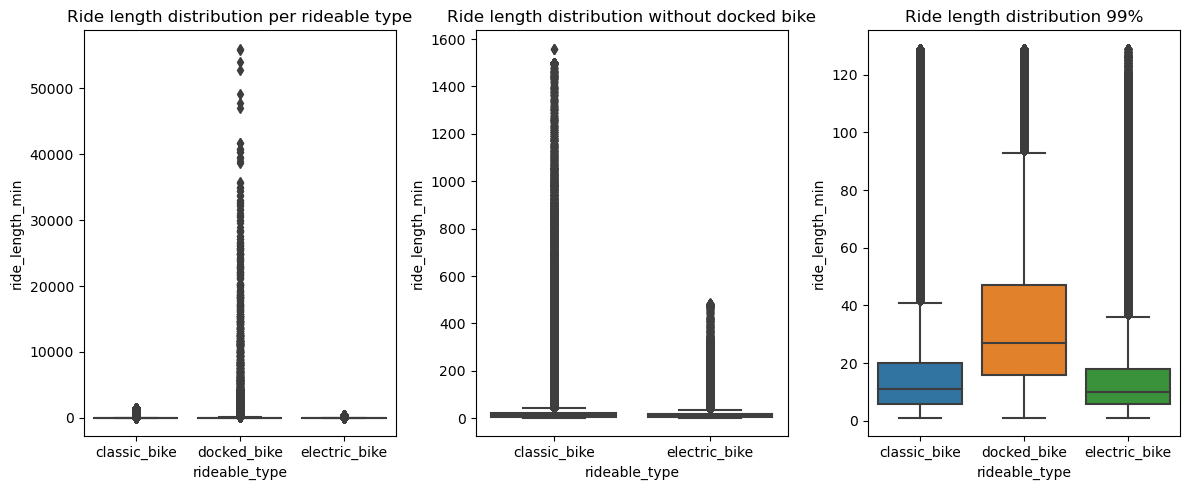

In [34]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12,5),sharex=False)

plt.subplot(1,3,1)
ax1 = sns.boxplot(data=df,x='rideable_type',y='ride_length_min')
ax1.set_title('Ride length distribution per rideable type')

# Filtering out the docked_bike value
no_docked_bike = df.query('rideable_type != "docked_bike"')

plt.subplot(1,3,2)
ax2 = sns.boxplot(data = no_docked_bike, x='rideable_type', y='ride_length_min')
ax2.set_title('Ride length distribution without docked bike')

# Filtering our the 1% of values
percent_99 = np.percentile(df['ride_length_min'],99)
df_99 = df.loc[(df['ride_length_min'] <= percent_99)]

plt.subplot(1,3,3)
ax3 = sns.boxplot(data=df_99,x='rideable_type',y='ride_length_min')
ax3.set_title('Ride length distribution 99%')


plt.tight_layout()
plt.show()

Ride length per weekday
Let's see what is the difference between users in terms of ride length per day

In [113]:


day_grp = df_99.groupby(['member_casual','day']).mean(numeric_only=True).reset_index()
day_line=px.line(data_frame=day_grp,x='day',y='ride_length_min',color='member_casual')


day_line.show()

We can see that the casual users average ride length fall during weekdays and rise during the weekends.

Percentage of member and casual users

What is the proportion of member and casual users from the total?

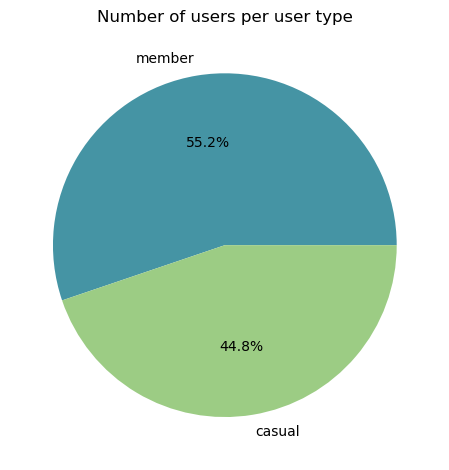

In [129]:
users = df['member_casual']

plt.pie(users.value_counts(),labels=users.unique(),colors=[blue,green],autopct="%1.1f%%")

plt.title('Number of users per user type')
plt.tight_layout()
plt.show()


Number of rides per user type

How many rides each type of user did? and for every type of rideable?

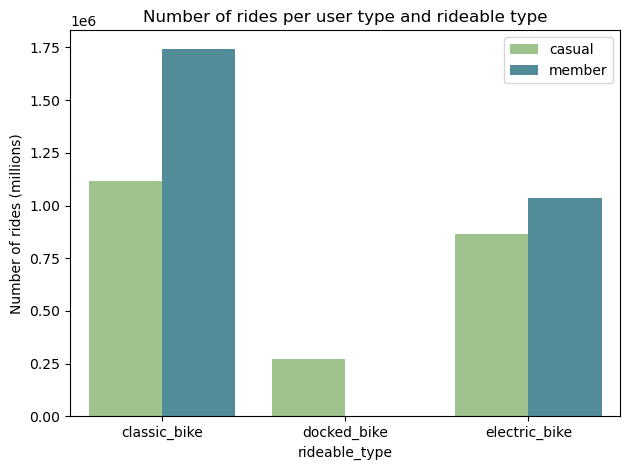

In [130]:
ride_user_grp = df.groupby(['member_casual','rideable_type'])['ride_id'].count().reset_index(name='count')

ax = sns.barplot(data=ride_user_grp,x='rideable_type',y='count',hue='member_casual',palette=[green,blue],hue_order=['casual','member'])
                
plt.ylabel('Number of rides (millions)')

plt.legend()
plt.title('Number of rides per user type and rideable type')
plt.tight_layout()

plt.show()

We can see that the members ride more often than casual members in both classic and electric bikes, and we also see a lack of usage of the docked bikes by members

Number of rides per month

What are the tendencies in the number of rides each type of user did each month?

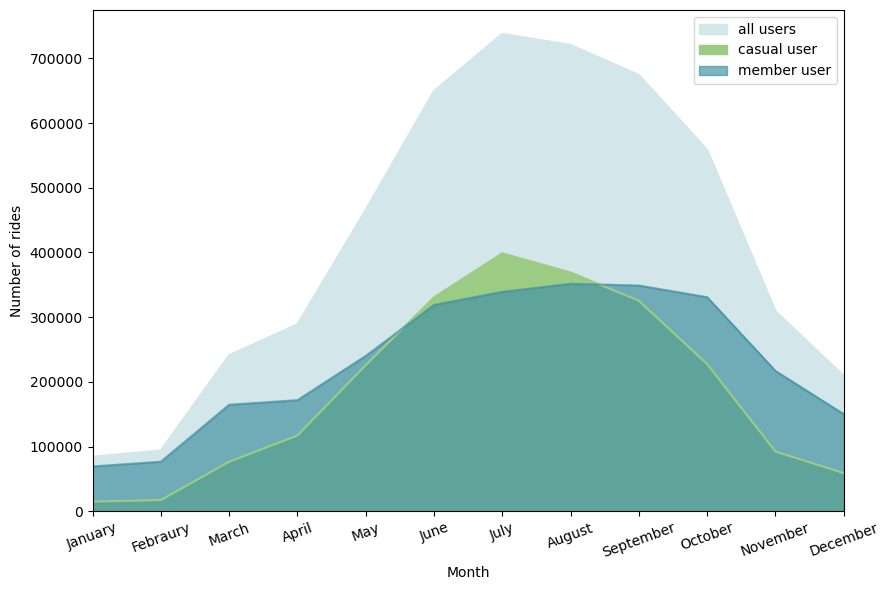

In [131]:
months = ['','January','Febraury','March','April','May','June','July','August','September','October','November','December']

fig, ax =plt.subplots(1,1,figsize=(9,6))

df['month'].value_counts().sort_index().plot(kind='area', label='all users',color=gray,alpha=1)
df.query('member_casual == "casual"')['month'].value_counts().sort_index().plot(kind='area', label='casual user',color=green,alpha=1)
df.query('member_casual == "member"')['month'].value_counts().sort_index().plot(kind='area', label='member user',color=blue,alpha=0.7)

ax.set_xticks(range(len(months)))
ax.set_xticklabels(months)

plt.xlim([1,12])
plt.xticks(rotation=20)
plt.legend()
plt.xlabel('Month')
plt.ylabel('Number of rides')
plt.tight_layout()
plt.show()

For all type of users, we see the rise in spring months, the spike during the summer months. And the fall entering autumn and the bottom at winter.

But we also see that the members tend to maintain the number of rides for the summer and autumn seasons. And on the contrary, the casual users take the lead in the mid-summer and then the number of rides fall faster than those for members.

6.- Act
Conclusion
With these findings we can give some insights and answer the question to the core business task: Indentify the differences between "Casual" and "Member" users.

Casual users ride on average longer than member users, but member users ride length doesn't fluctuate as much during the week.
Member users ride more often than casual riders, except on weekends and during the peak of the summer.
Member users follow predictable paths from and to the city center, whereas Casual users ride closer to leisure areas and follow less predictable paths.
Without more information about the users, like age, job, or gender, we can only infer by the data provided.

Suggestion